In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("Mall_Customers.csv")

In [10]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## Univariate Analysis

In [11]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

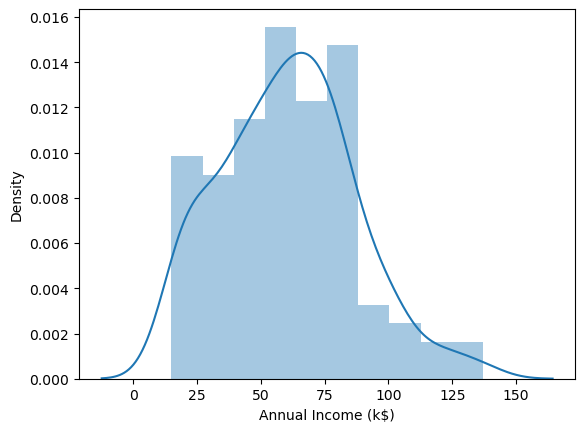

In [12]:
sns.distplot(df['Annual Income (k$)']);

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

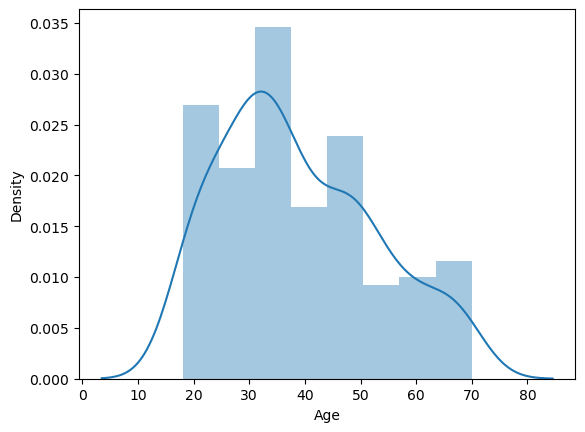

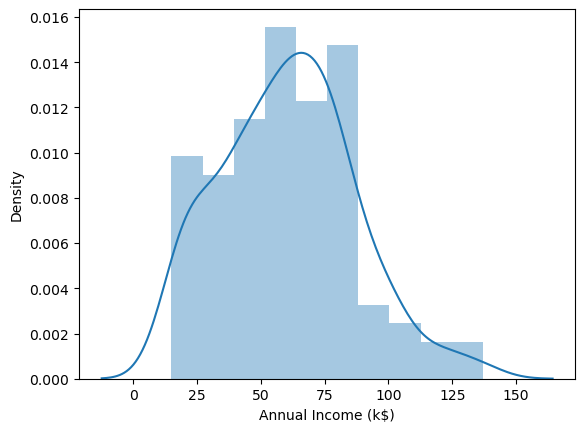

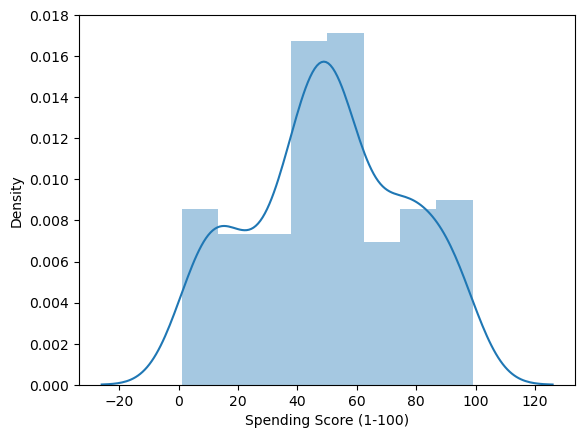

In [14]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i]);

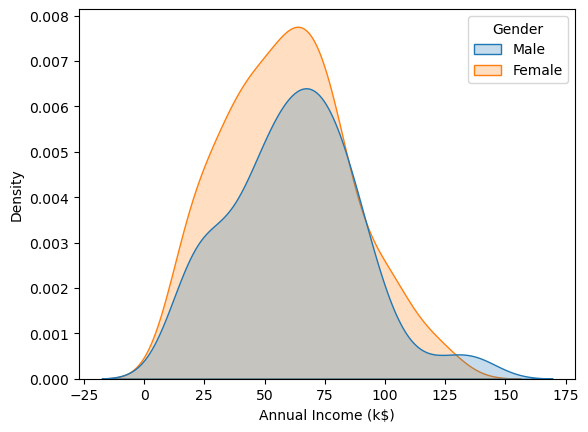

In [16]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

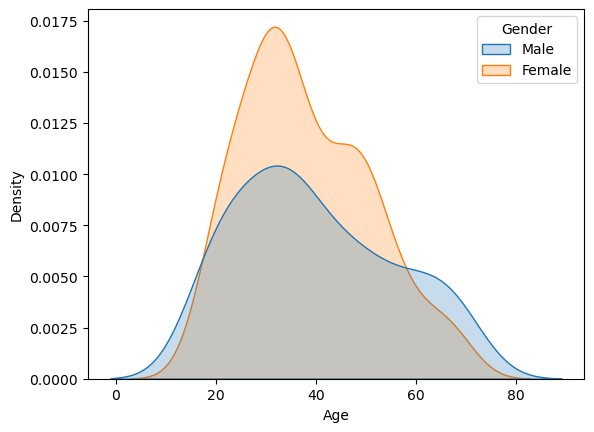

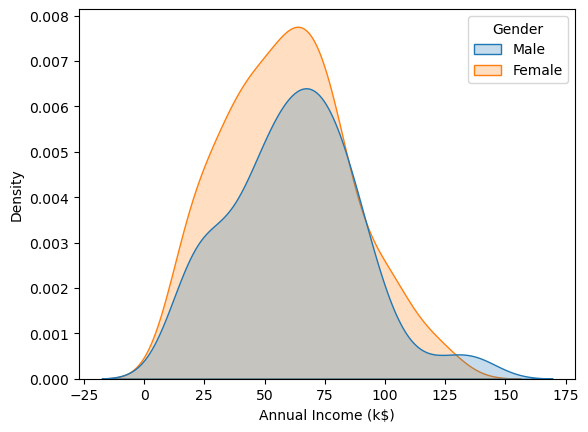

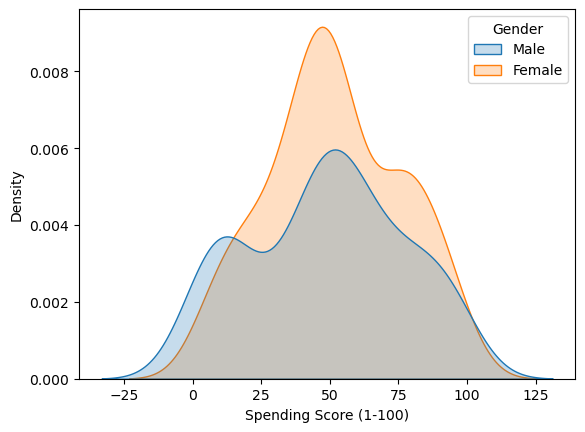

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender']);

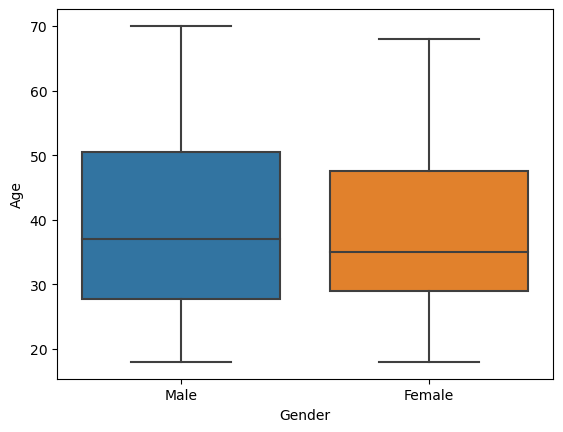

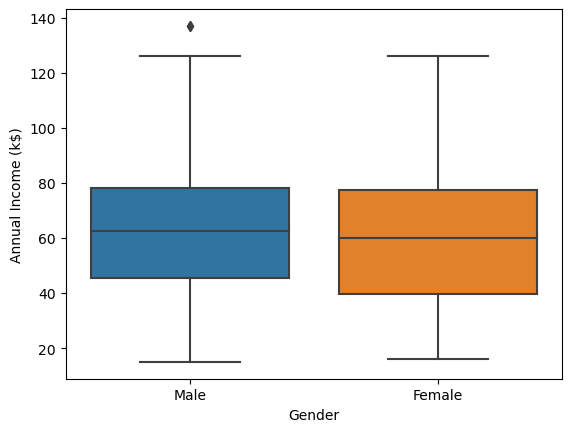

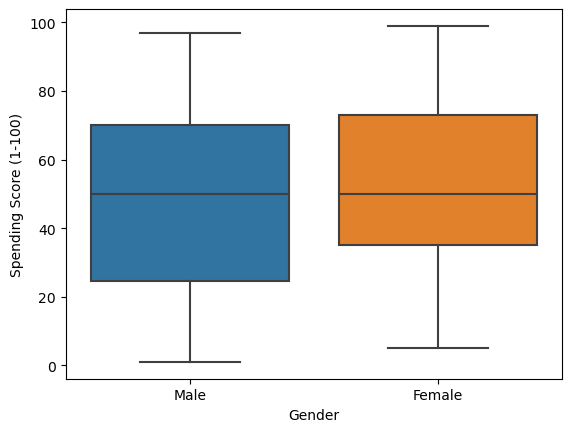

In [20]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y = df[i]);

In [22]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

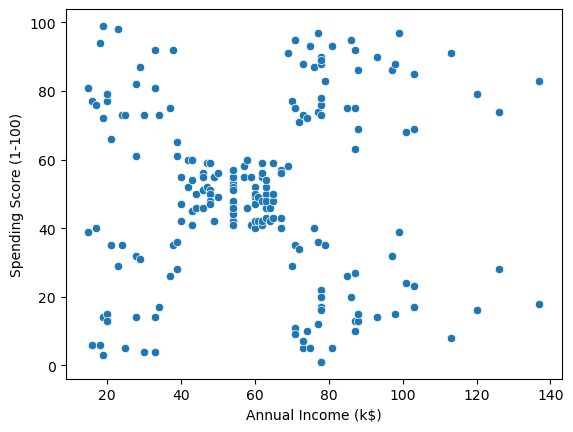

In [23]:
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)');

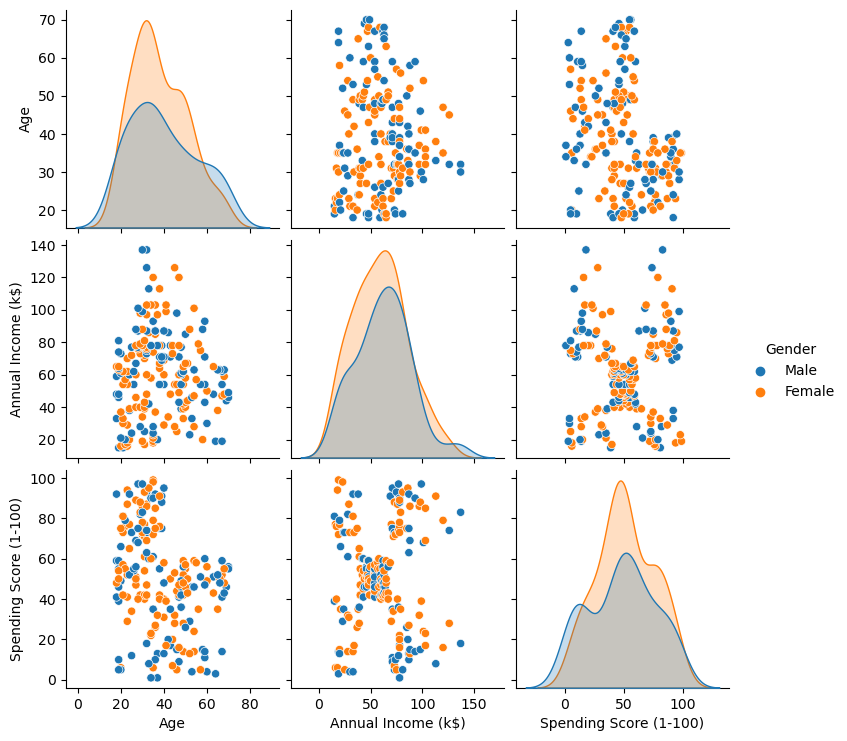

In [40]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df,hue='Gender');

In [35]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364

In [42]:
df.corr()

Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000

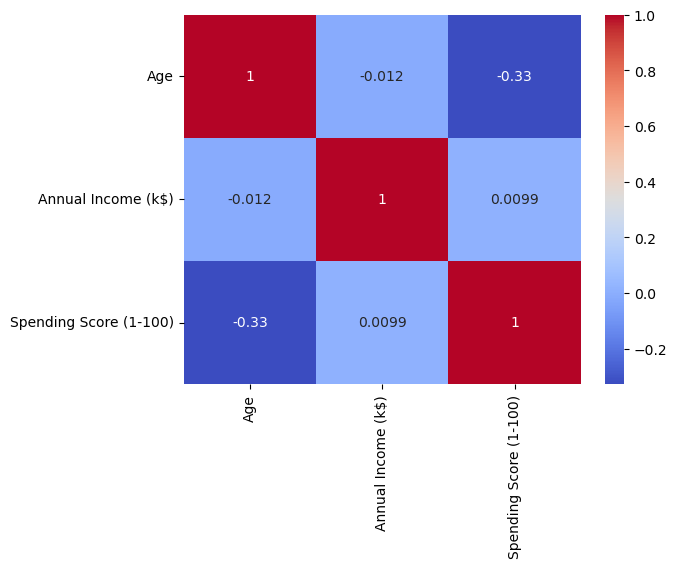

In [44]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

## Clustering - Univatiate, Bivariate, Multivariate

In [66]:
clustering1 = KMeans(n_clusters=3)

In [67]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [68]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [69]:
df['Income Cluster'] = clustering1.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster
0    Male   19                  15                      39               0
1    Male   21                  15                      81               0
2  Female   20                  16                       6               0
3  Female   23                  16                      77               0
4  Female   31                  17                      40               0

In [70]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [71]:
clustering1.inertia_

23517.33093093093

In [72]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [73]:
intertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.33093093093,
 13278.112713472487,
 8481.496190476191,
 5050.9047619047615,
 3941.4163614163617,
 2836.3399877899883,
 2192.249877899878,
 1831.1106060606062]

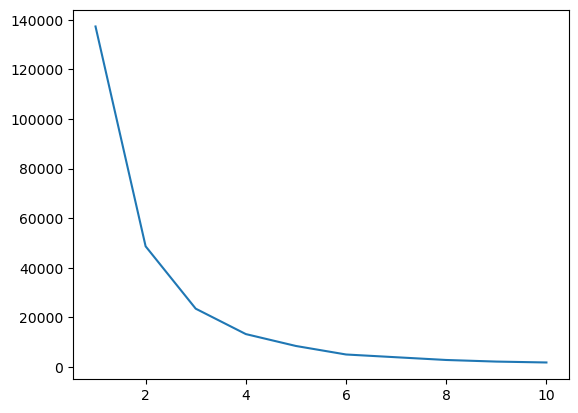

In [75]:
plt.plot(range(1,11),intertia_scores);

In [76]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [77]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               39.500000           33.486486               50.229730
1               37.833333           99.888889               50.638889
2               38.722222           67.088889               50.000000

## Bivatiate Clustering

In [79]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               0   
1    Male   21                  15                      81               0   
2  Female   20                  16                       6               0   
3  Female   23                  16                      77               0   
4  Female   31                  17                      40               0   

   Spending and Income Cluster  
0                            4  
1                            5  
2                            4  
3                            5  
4                            4

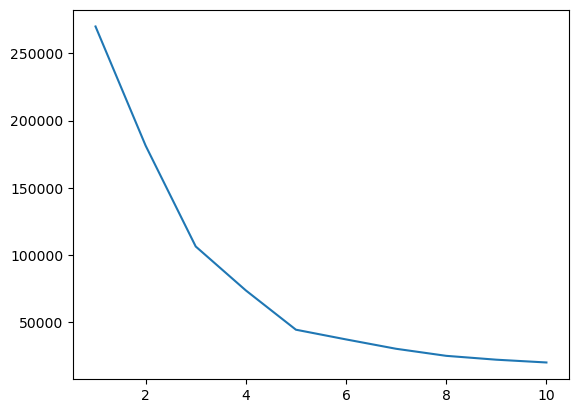

In [91]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11),intertia_scores2);

In [99]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

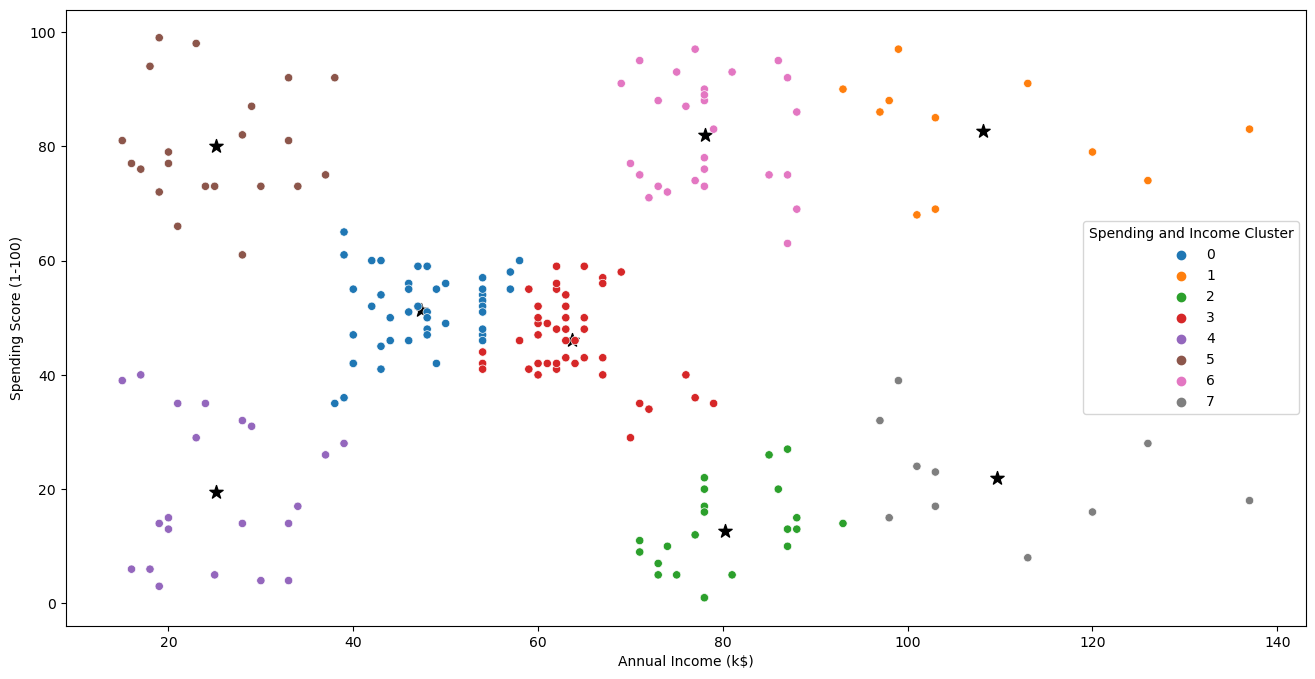

In [116]:
plt.figure(figsize=(16,8));
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)',hue='Spending and Income Cluster', palette = 'tab10');
plt.savefig('clustering_bivaraiate.png')

In [101]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender                         Female      Male
Spending and Income Cluster                    
0                            0.590909  0.409091
1                            0.545455  0.454545
2                            0.318182  0.681818
3                            0.604651  0.395349
4                            0.619048  0.380952
5                            0.571429  0.428571
6                            0.535714  0.464286
7                            0.700000  0.300000

In [102]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            43.909091           47.295455   
1                            32.454545          108.181818   
2                            41.000000           80.181818   
3                            41.674419           63.720930   
4                            44.142857           25.142857   
5                            25.333333           25.095238   
6                            32.785714           78.035714   
7                            41.000000          109.700000   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         51.409091  
1                                         82.727273  
2                                         12.681818  
3                                         46.162791  
4                                         19.523810  
5                                         80.047619  
6                                         81.892857  
7                                         22.000000

In [103]:
#mulivariate clustering
from sklearn.preprocessing import StandardScaler

In [104]:
scale = StandardScaler()

In [105]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               0   
1    Male   21                  15                      81               0   
2  Female   20                  16                       6               0   
3  Female   23                  16                      77               0   
4  Female   31                  17                      40               0   

   Spending and Income Cluster  
0                            4  
1                            5  
2                            4  
3                            5  
4                            4

In [107]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0   19                  15                      39               0   
1   21                  15                      81               0   
2   20                  16                       6               0   
3   23                  16                      77               0   
4   31                  17                      40               0   

   Spending and Income Cluster  Gender_Male  
0                            4            1  
1                            5            1  
2                            4            0  
3                            5            0  
4                            4            0

In [108]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [109]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39            1
1   21                  15                      81            1
2   20                  16                       6            0
3   23                  16                      77            0
4   31                  17                      40            0

In [110]:
dff=scale.fit_transform(dff)

In [111]:
dff = pd.DataFrame(scale.fit_transform(dff))

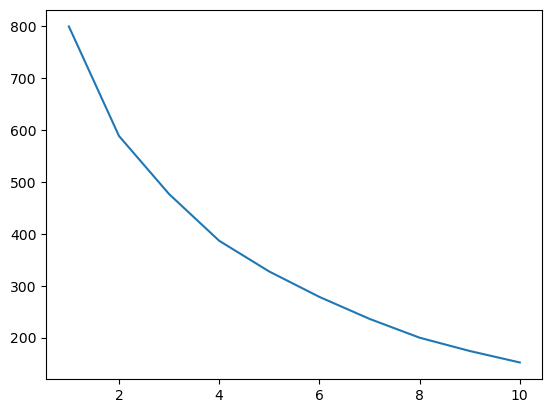

In [114]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
    
plt.plot(range(1,11),intertia_scores3);

In [115]:
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0      Male   19                  15                      39               0   
1      Male   21                  15                      81               0   
2    Female   20                  16                       6               0   
3    Female   23                  16                      77               0   
4    Female   31                  17                      40               0   
..      ...  ...                 ...                     ...             ...   
195  Female   35                 120                      79               1   
196  Female   45                 126                      28               1   
197    Male   32                 126                      74               1   
198    Male   32                 137                      18               1   
199    Male   30                 137                      83               1   

     Spending and Income Cluster  
0                              4  
1                              5  
2                              4  
3                              5  
4                              4  
..                           ...  
195                            1  
196                            7  
197                            1  
198                            7  
199                            1  

[200 rows x 6 columns]

In [118]:
df.to_csv('Clustering.csv')